<h2>OBSERVATIONAL ASTROPHYSICS – FALL 2023 Analysing real spectra (120 points)</h2>

In this exercise we will look at the spectra of three objects that we took as part of the class in a previous year: M57 - a planetary nebula, Jupiter as seen in reflected sunlight, and the star Vega.

All code elements that you need to change will be indicated with a #**************** section in the code

There are 6 problems.  This assignment is worth 120 points.

**Due on Dec. 6 at 11:59am**

In [1]:
import astropy.units as u
from astropy.table import unique, Table
import numpy as np
from matplotlib import pyplot as plt
import os
from specutils import Spectrum1D
from numpy.random import uniform
import matplotlib.transforms as transforms

In [2]:
'''
This subroutine will allow us to draw lines on our spectra.  

It takes as input a dictionary of lines and plots a vertical line and a label at each wavelength of the dictionary.

'''
def lineplot(linelist):
    transDA = transforms.blended_transform_factory(
    ax.transData, ax.transAxes) #  from the transforms tutorial

    for line in linelist:
        if((line[1]>lammin) & (line[1]<lammax)):
            plt.axvline(linewidth=0.5,color='r',x=line[1])
            plt.text(line[1], #wavelength from list
                     uniform(0.5,1), # wiggle the labels so they don't overlap
                     line[0], # string label
                     transform=transDA,
                     color='red',
                     family='serif')

### Measure characteristics of the spectrum

This spectrum was taken with the Breyo telescope.  It has been fully reduced and wavelength calibrated.  The flux is delivered in each pixel.

### Identify features in spectrum of M57

In this exercise you will identify various components of the spectrum of M57.  In doing this you can zoom in and out of the plot using the `ax.set_xlim` and `ax.set_ylim()` commands.  

### Problem 1 - identify lines (10 points)
Uncomment all the spectral features in the "linelist" variable that correspond to clear features in the spectrum.    *Note: Not all features have line designations in my list*

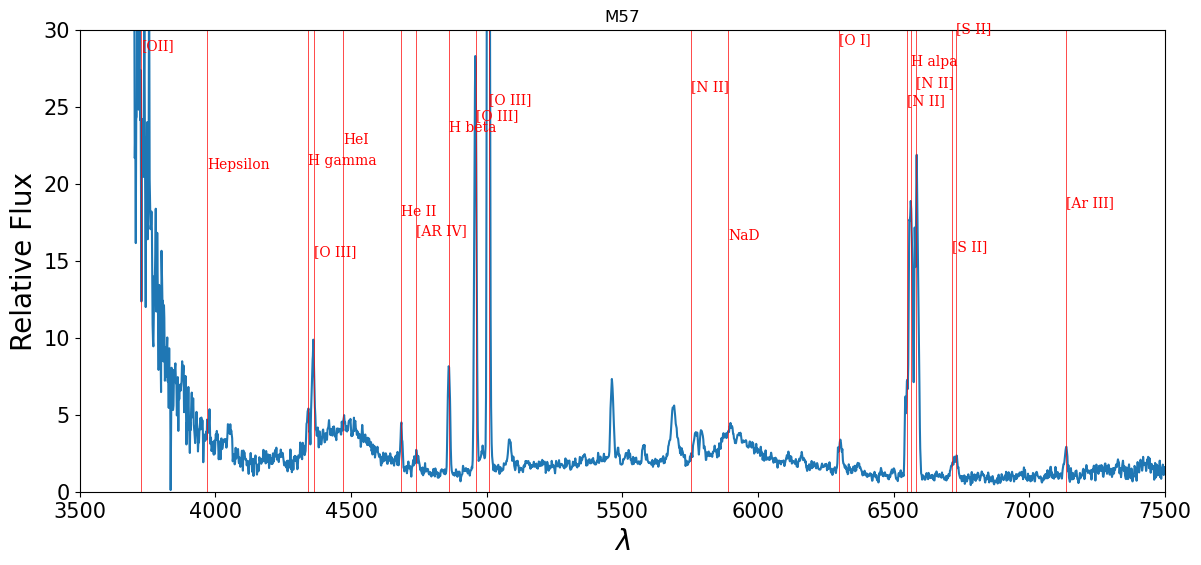

In [105]:
#read in the three spectra we took
m57_path = 'M57_Object_CROP.fit'
vega_path ='Vega_Object_CROP.fit'
jup_path = 'Jupiter_Object_CROP.fit'

specm57 = Spectrum1D.read(m57_path)
specjup = Spectrum1D.read(jup_path)
specvega = Spectrum1D.read(vega_path)

#plot the M57 spectrum
plt.figure(figsize = (14,6))
ax = plt.gca()
plt.plot(specm57.wavelength,specm57.flux,label="M57")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda$",fontsize=20)
plt.ylabel("Relative Flux",fontsize=20)
plt.title('M57')

#**************
#your code here
#you can change these to zoom in and out of certain parts of the spectra.  
#Make a copy of these and change your copy so as to remember what the 
#original values were
#fluxmin = 0
#fluxmax = 30
#lammin = 3600
#lammax = 7400
#ax.set_ylim([fluxmin,fluxmax])
#ax.set_xlim([lammin,lammax])

fluxmin = 0
fluxmax = 30
lammin = 3500
lammax = 7500
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])
#***************************
#your code here
#Uncomment all of the lines that correspond to identifiable features in the spectra
linelist = [
     ('[AR IV]',4740),
    ('[OII]',3727),
     ('[O III]',4363),
     ('[O III]',4959),
     ('[O III]',5007),
     ('[O I]',6300),
#     ('[OI]',6363),
     ('[N II]',6548),
     ('[N II]',6584),
     ('[S II]',6716),
     ('[S II]',6731),
#     ('CIII',4647),
#     ('MgI',5170),
#     ('FeI', 5270),
     ('Hepsilon',3970),
#     ('Hdelta',4103),
     ('H gamma',4341),
     ('H beta',4861),
     ('H alpa',6563),
     ('NaD', 5890),
#     ('HeII',4541),
     ('He II',4686),
     ('HeI',4471),
#     ('HE II',5411),
#     ('[CL III]',5517),
#     ('[CL III]',5537),
     ('[N II]',5755),
#     ('He I',5875),
#     ('HeI',7065),
     ('[Ar III]',7135),
#     ('FeI',5335)
]
#draw lines on the spectrum
lineplot(linelist)

### Problem 2  - measure the spectral resolution of the spectrograph (30 points)
Using the code block below, measure the wavelength resolution $\Delta \lambda$ and the spectral resolution $R$ for the M57 spectra.  Any derivation you do to solve the problem must be explained here.  

My Answer:
I chose to use H-Beta as my spectral line. I estimated all variables using my eye. To calculate the spectral resolution I used the formula R=Lambda/DeltaLambda.

Assume that the intrinsic width of the spectral lines is significantly smaller than $\Delta\lambda$.  

We will try two different estimates, one using measurements by eye and one by fitting a model to the line.

There are parts a-d in this problem.

#### Problem 2a - compute the quantities using a by eye estimates (10 points)

Delta Lambda = 10.70
R = 454.30


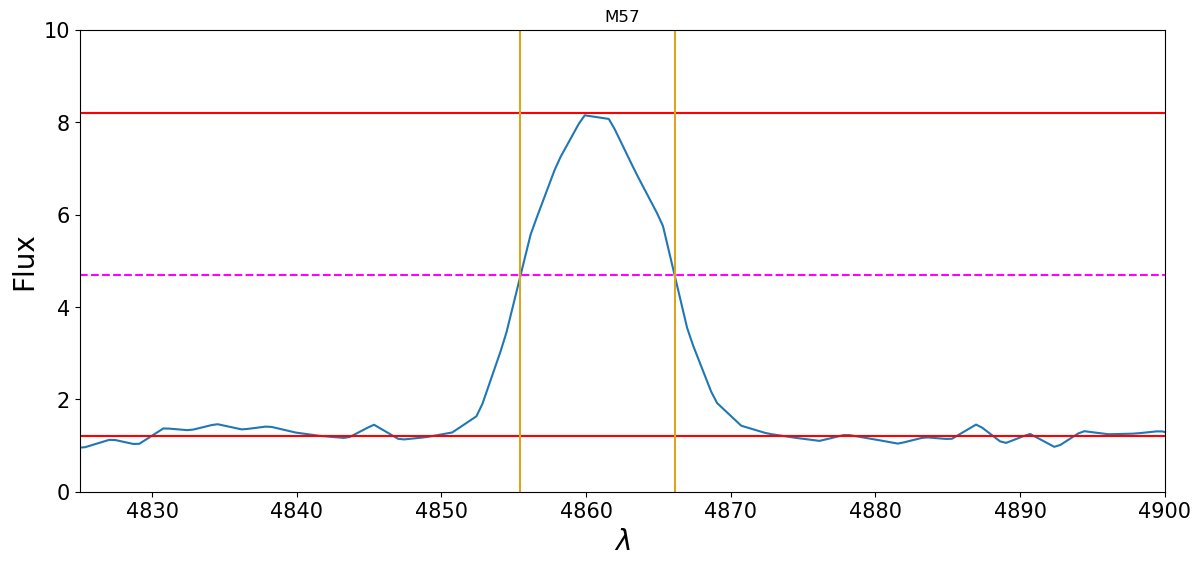

In [67]:
#first zoom in on one emission line and plot it.
#Choose one of the identified lines, which are real, and which is isolated enough to properly characterize.
#plot the M57 spectrum
plt.figure(figsize = (14,6))
ax = plt.gca()
plt.plot(specm57.wavelength,specm57.flux,label="M57")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda$",fontsize=20)
plt.ylabel("Flux",fontsize=20)
plt.title('M57')

#you can change these limits to zoom in and out of certain parts of the spectra.  You should use the Hbeta line for your measurement
#**************
#Your code here.
fluxmin = 0
fluxmax = 10
lammin = 4825
lammax = 4900
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])

#In the following section of code you will need to estimate the continuum and the peak of the line as horizontal lines.  Then 
#continuum level
contlevel = 1.2
plt.axhline(contlevel, color='red')

#line peak
linepeak = 8.2
plt.axhline(linepeak, color='red')

#Provide a calculation to determine the half maximum
halfmax = ((linepeak+contlevel)/2)
plt.axhline(halfmax,color='magenta',linestyle='--')

#Now find wavelengths corresponding to short and long wavelength sides of FWHM by using the vertical 
#lines that will be drawn on the graph
lowlam = 4855.45
highlam = 4866.15
plt.axvline(lowlam,color='goldenrod')
plt.axvline(highlam,color='goldenrod')

#calculate the FWHM
deltalam = highlam - lowlam
print('Delta Lambda = %5.2f' % deltalam)

#calculate the spectral resolution
lamcent = 4861
specres = lamcent/deltalam
print('R = %6.2f' % specres)

#### Problem 2b - compute the quantities by fitting a function (10 points)

First we need to fit a continuum and subtract it, as the fitting functions require a continuum subtracted spectrum.  The result of this should be a continuum with a level of zero.  Your continuum subtracted spectrum should have as flat of a continuum as possible, ignoring the regions that you exclude from the fitting (see below).

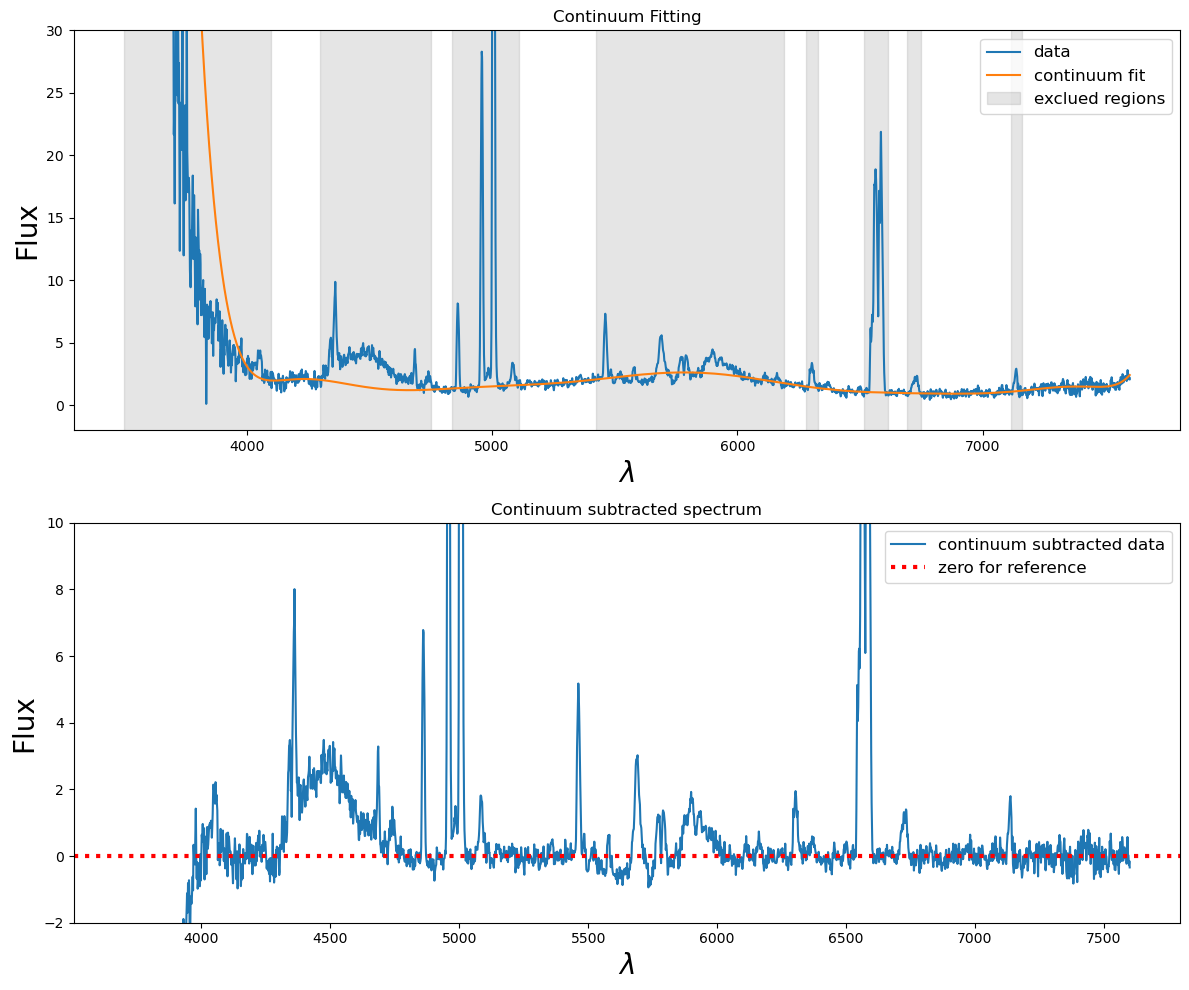

In [159]:
from specutils.fitting.continuum import fit_generic_continuum
from specutils.spectra import Spectrum1D, SpectralRegion
import warnings
import astropy.units as u
from astropy.modeling import models, fitting

#you will need to define spectral regions to exclude.  The fitting algorithm fits a running median of the spectra, 
#which helps to get rid of weak emission lines, however, you should try to define windows to remove the other emission lines. 
#We make these regions using the "SpectralRegion" function and I give you two such regions below to demonstrate.  
#I exclude the very blue short wavelength region as it is hard to fit that with the function I use and because
#there are no emission lines of interest there.
#You should fill in the other regions.
#these are lists of the lower and upper bounds of the regions not to fit
lamlow = [3500,4300]
lamhigh = [4100,4750]

#************************
#your other regions go here.  
#a list of the lower bounds
lamlow.extend([4835,5425,6280,6515,6690,7115])
#a list of the upper bounds
lamhigh.extend([5110,6190,6330,6615,6750,7160])

#this creates the SpectralRegion that contains all of the excluded regions
for ilam,lam in enumerate(lamlow):
    #create the excl_region for the first region
    if ilam==0:
        excl_region = SpectralRegion(lamlow[ilam] * u.Angstrom,lamhigh[ilam] * u.Angstrom)

    #append to it for the following regions.
    excl_region += SpectralRegion(lamlow[ilam] * u.Angstrom,lamhigh[ilam] * u.Angstrom)
    
#*************
#You will need to play around with the degree of the Chebyshev polynomial and the median_window parameter to get a good fit.  
#Your continuum subtracted spectrum should
with warnings.catch_warnings():  # Ignore warnings
    warnings.simplefilter('ignore')
    fitted_continuum = fit_generic_continuum(specm57,exclude_regions=excl_region, median_window= 11 ,
                                             model=models.Chebyshev1D(degree= 12))
#this is the fitted continuum
y_fit = fitted_continuum(specm57.wavelength)

#plot the spectrum and the continuum fit
f,(ax1,ax2) = plt.subplots(2,1,figsize=(12,10))  
ax1.plot(specm57.wavelength, specm57.flux,label='data')  
ax1.plot(specm57.wavelength, y_fit,label='continuum fit')  
ax1.set_title("Continuum Fitting")  
ax1.set_ylim(-2,30)
ax1.set_xlabel("$\lambda$",fontsize=20)
ax1.set_ylabel("Flux",fontsize=20)

#to help you decide which regions to exclude, plot gray regions that are excluded.
for ilam,lam in enumerate(lamlow):
    ax1.fill_betweenx([-100,100],lamlow[ilam],x2=lamhigh[ilam],color='gray',alpha=0.2,label='exclued regions')

    #only make the legend after the first iteration so it only makes one box
    if ilam==0:
        ax1.legend(fontsize=12)

#plot the continuum subtracted spectrum
contsubspec = specm57.flux - y_fit
ax2.plot(specm57.wavelength, contsubspec, label='continuum subtracted data')  
ax2.set_title("Continuum subtracted spectrum")  
ax2.set_ylim(-2,10)
ax2.axhline(0.0,color='red',linestyle=':',linewidth=3,label='zero for reference')
ax2.set_xlabel("$\lambda$",fontsize=20)
ax2.set_ylabel("Flux",fontsize=20)
ax2.legend(fontsize=12)

#this optimizes the spacing between the figures
f.tight_layout()

Now let's zoom in on the Hbeta line and see how well our continuum fit did.

Text(0, 0.5, 'Flux')

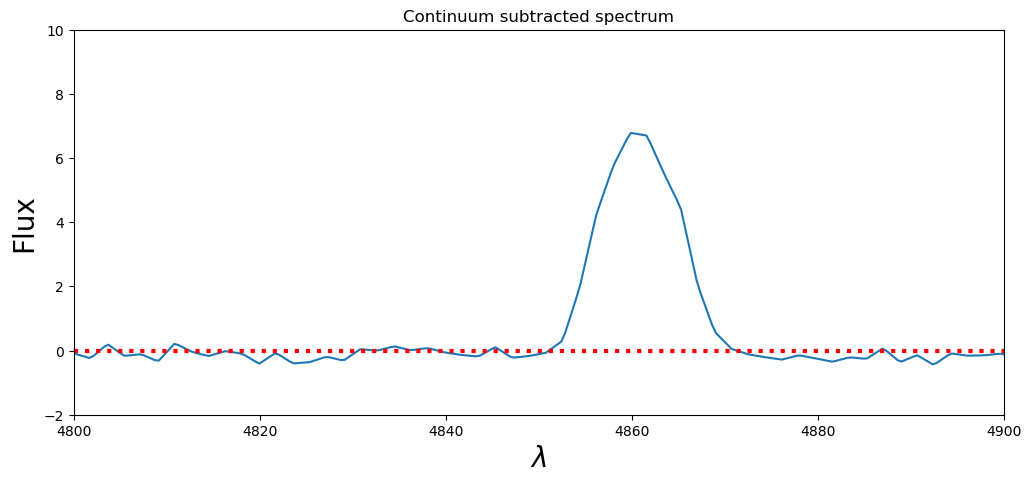

In [152]:
from specutils.fitting import fit_lines

#first zoom in on the Hbeta line
f,ax = plt.subplots(figsize=(12,5))  
ax.plot(specm57.wavelength, contsubspec, label='continuum subtracted data')  
ax.set_title("Continuum subtracted spectrum")  
ax.set_xlim(4800,4900)
ax.set_ylim(-2,10)
ax.axhline(0.0,color='red',linestyle=':',linewidth=3,label='zero for reference')
ax.set_xlabel("$\lambda$",fontsize=20)
ax.set_ylabel("Flux",fontsize=20)

turns out that even our best efforts in Problem 2b couldn't get the continuum to be zero.  That's because our continnuum fit was trying to fit all the continuum everywhere, when in reality we only needed it in one part.  So let's fix this by computing the mean of the continuum away from the line and correcting the line.

In [160]:
contlam = (specm57.wavelength>4800 *u.Angstrom) & (specm57.wavelength<4840 * u.Angstrom)
print(contsubspec[contlam])

[-1.23311400e-01 -1.58889532e-01 -1.94398880e-01 -2.29819834e-01
 -1.78621948e-01 -7.60528445e-02  2.66780257e-02  1.29592955e-01
  1.81389987e-01  9.61055756e-02  1.08108521e-02 -7.44900107e-02
 -1.59871399e-01 -1.55673087e-01 -1.43264294e-01 -1.30810320e-01
 -1.18396521e-01 -1.42234087e-01 -1.94624722e-01 -2.47081399e-01
 -2.99599886e-01 -3.14926863e-01 -1.84862971e-01 -5.47541976e-02
  7.54637718e-02  2.05773413e-01  1.74390197e-01  1.14006460e-01
  5.35571575e-02 -6.92987442e-03 -5.29449582e-02 -8.39775205e-02
 -1.15050018e-01 -1.46126330e-01 -1.68128490e-01 -1.31980717e-01
 -9.57810879e-02 -5.95313311e-02 -2.32846737e-02 -3.03841233e-02
 -4.97601628e-02 -6.92002773e-02 -8.86365771e-02 -1.30012155e-01
 -2.01399684e-01 -2.72869706e-01 -3.44389975e-01 -4.06093240e-01
 -3.27272534e-01 -2.48369038e-01 -1.69417322e-01 -9.04200077e-02
 -1.21995270e-01 -1.99067652e-01 -2.76224494e-01 -3.53400230e-01
 -4.00034606e-01 -3.90178859e-01 -3.80320191e-01 -3.70451391e-01
 -3.60588849e-01 -3.21451

mean continuum = -0.105


Text(0, 0.5, 'Flux')

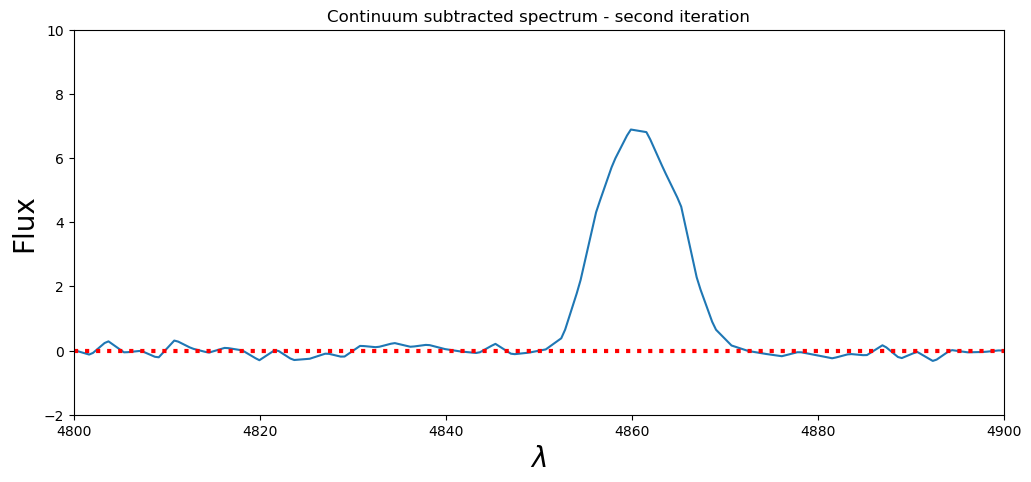

In [161]:
#compute the average of a region away from the line using the zoom in above
#*********************
#your code here
#find the region with a boolean array
contlam = (specm57.wavelength>4800 *u.Angstrom) & (specm57.wavelength<4840 * u.Angstrom)
Region = contsubspec[contlam]
#now compute the average of the continuum subtracted spectrum in that region and print it out.
meancont = np.mean(Region)
print('mean continuum = %5.3f' % meancont)

#now correct the continuum subtracted spectrum by that amount
contsubspec -= meancont

#first zoom in on the Hbeta line
f,ax = plt.subplots(figsize=(12,5))  
ax.plot(specm57.wavelength, contsubspec, label='continuum subtracted data')  
ax.set_title("Continuum subtracted spectrum - second iteration")  
ax.set_xlim(4800,4900)
ax.set_ylim(-2,10)
ax.axhline(0.0,color='red',linestyle=':',linewidth=3,label='zero for reference')
ax.set_xlabel("$\lambda$",fontsize=20)
ax.set_ylabel("Flux",fontsize=20)


#### Problem 2c (5 points)
Comment on whether the spectra now has a better continuum subtraction and how you know this.

**your answer here**
The spectra now looks to have a better continuum. This is known because the continuum data hovers around zero at an even rate meaning that there is an equal number of points above and below zero.

Now you will need to fit a gaussian to the spectrum.  We blow up around the line and the run a Gaussian line fitter to estimate the parameters of the Gaussian.  You will then use these to measure the $\Delta \lambda$ and the spectral resolution $R$

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean             stddev     
                           Angstrom          Angstrom    
    ----------------- ----------------- -----------------
    7.126211815552077 4860.766986857053 4.119688037632541
Delta Lambda =  9.62
R = 505.30


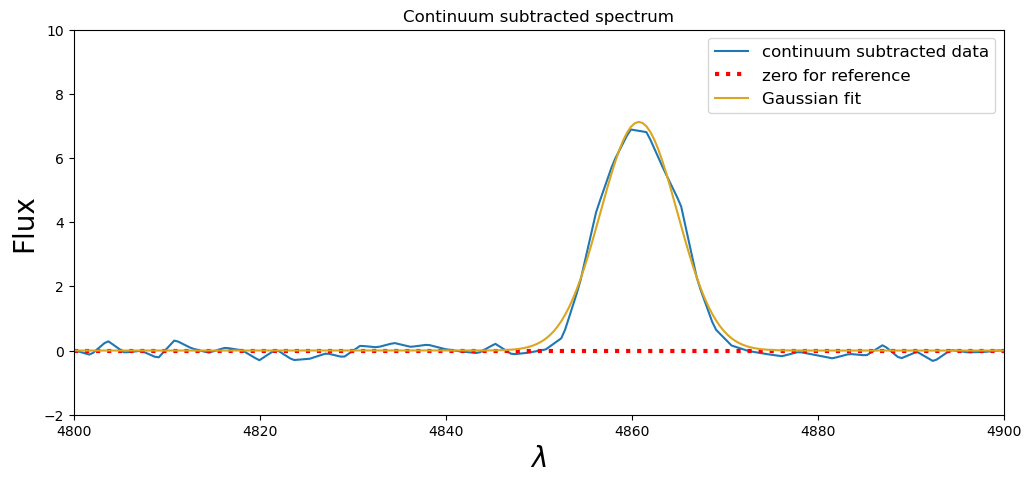

In [168]:
#first zoom in on the Hbeta line
f,ax = plt.subplots(figsize=(12,5))  
ax.plot(specm57.wavelength, contsubspec, label='continuum subtracted data')  
ax.set_title("Continuum subtracted spectrum")  
ax.set_xlim(4800,4900)
ax.set_ylim(-2,10)
ax.axhline(0.0,color='red',linestyle=':',linewidth=3,label='zero for reference')
ax.set_xlabel("$\lambda$",fontsize=20)
ax.set_ylabel("Flux",fontsize=20)

#now fit a gaussian to the spectrum
# Fit the spectrum and calculate the fitted flux values (``y_fit``)
spectrum = Spectrum1D(flux=contsubspec, spectral_axis=specm57.wavelength)

#**********************
#you need to supply the initial guesses for the amplitude, mean, and stddev
#we are assuming thast the flux is unitless because the spectrum isn't calibrated.
g_init = models.Gaussian1D(amplitude=7, mean=4861 , stddev=5 )

#fit the line using the initial guesses
g_fit = fit_lines(spectrum, g_init,get_fit_info=True)
#determine the model flux
y_fit = g_fit(specm57.wavelength)
#plot model flux
ax.plot(specm57.wavelength,y_fit,color='goldenrod',label='Gaussian fit')
ax.legend(fontsize=12)

#print all the paramters
print(g_fit)

#assign the standard deviation to a variable
params = g_fit.param_sets
amp = params[0][0]
mean = params[1][0]
stddev = params[2][0]

#*********************
#Your code here
#you will need to use the fitted parameters to determine the Delta lambda and the spectral resolution
# (remove for students) I compute this using the relation between a Gaussian sigma and the FWHM
deltalam = 2.335*stddev
print('Delta Lambda = %5.2f' % deltalam)

#calculate the spectral resolution
specres = mean/deltalam
print('R = %6.2f' % specres)


#### Problem 2d (5 points)
Comment in this cell on how the two methods agree and which one you think is more reliable.

**answer here** 
Both methods obtained a delta lambda of about 10 but the resolutions changed because the central lambda used in the first method was given while in the gaussian method we used a mean. I think that the gaussian method is more reliable because we adjusted for any continuum differences and used averages of data.

### Problem 3 (10 points)
Assume that the slit went right through the center of the planetary nebula.  Using what you know about the composition of planetary nebula (not necessarily from this class), describe here from where the broad emission lines and sharp rise in flux at the blue end of the planetary nebula come from.

**answer here**
This spike comes from dust being able to reflect blue light more easily than red. The dust particles are so small that the larger wavelengths struggle to be absorbed and emitted.

### Problem 4 (30 points)

In this problem you see a comparison of Jupiter's spectrum to that of a G2V star similar to the sun. You will need to answer the following questions

a. Measure the temperature of each spectrum from the shape of the spectrum.

b. Compare the two temperatures.  

c. All the visible light we see from Jupiter is reflected sunlight.  Do your best given your knowledge of how light propogates through different media to describe a possible origin for the relative values of the temperatures.  You can also include a discussion of the relative colors of the spectra.

For each part here I would like a significant amount of discussion.  You will put your answers below the code.

*As an aside, note that the very wide absorption lines longward of 6000$\mathring A$ in Jupiter's spectrum are absorption bands from molecules in Jupiter's atmosphere.  These bands absorb light over a wide wavelength range.*

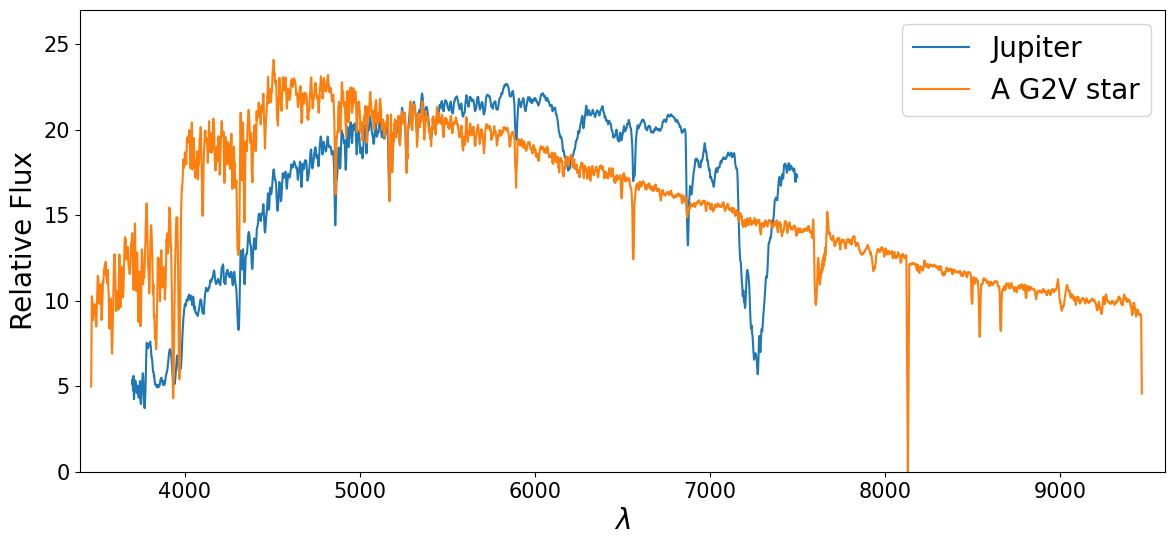

In [178]:
#this is a comparison star from a library similar to that we used in our 
#very first spectral exercise.
starpath = '95128.txt'  #G2V
star1 = Table.read(starpath,format='ascii', names=('lambda','flam'))

#plot Jupiter
plt.figure(figsize = (14,6))
ax = plt.gca()
plt.plot(specjup.wavelength,specjup.flux*20,label="Jupiter")

#smooth the comparison stellar spectrum so that the many spectral features
#don't make the comparison difficult.  We use a boxcar filter of size "kernel_size"
#**********
#You should make the intial plot with a smoothing kernel of 1 to see how the unsmoothed 
#very high resolution G2V spectrum looks like.  Then you should change the kernel size to 20 to see 
#how it is easier to use.
#If you'd like you can play more with the kernel size, but it is not required.
kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size
star1convflam = np.convolve(star1['flam'], kernel, mode='same')
#plot the convolved spectrum
plt.plot(star1['lambda'],star1convflam*20, label = 'A G2V star')

#**************
#you can change these to zoom in and out of certain parts of the spectra.  
#Make a copy of these and change your copy so as to remember what the 
#original values were
fluxmin = 0
fluxmax = 27
lammin = 3400
lammax = 9600
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda$",fontsize=20)
plt.ylabel("Relative Flux",fontsize=20)
plt.legend(fontsize=20)

In [202]:
#***************
#Any code needed for problem 4 goes here.  Please print your temperatures.  
#Temperature Measurement
Jmaxindex = (specjup.flux==np.max(specjup.flux))
Jlammax = np.array(specjup.wavelength)[Jmaxindex]
Starmaxindex = (star1convflam==np.max(star1convflam))
Starlammax = np.array(star1['lambda'])[Starmaxindex]
b = 2.898*(10**(-3))
JupTemp = b/(Jlammax[0]*(10**(-10)))
G2VTemp = b/(Starlammax[0]*(10**(-10)))
print('Jupiter Temp = ', JupTemp, 'Kelvin')
print('G2V Temp = ', G2VTemp, 'Kelvin')

Jupiter Temp =  4961.123143547405 Kelvin
G2V Temp =  6429.427164218841 Kelvin


**answer to part a here**  Make sure to provide all calculations either in code or in LaTeX.
To calculate temperature we can use Wein's displacement law. It is important to note that Wein's displacement law only provides temperatures from a source of blackbody radiation. Stars are close, but Jupiter is not so the measurements do have inaccuracies.
$\lambda_{max}=\fraction{b}{T}$ Here $b$ is a proportionality constant.

**answer to part b here**  Make sure to provide all calculations either in code or in LaTeX.
The temperatures shown from Wein's law results in the G2V Star being about 1500 degrees hotter than Jupiter.

**answer to part c here**  Make sure to provide all calculations either in code or in LaTeX. Jupiter is nowhere near as hot as Wein's law provides. This is because the light from Jupiter is reflected sunlight. When the light from the Sun meets Jupiter's atmosphere the gas particles with their small size are more likely to absorb and re-emit at shorter wavelengths at the surface. The larger wavelengths pass deeper into the atmosphere and are absorbed later. Particles could also absorb multiple photons at once and emit a higher energy shorter wavelength singular photon. Also when light meets a denser medium the bluer light bends more. This means that the shorter wavelengths are bent at an angle that pushes them through more surface-level atmosphere instead of going deeper. This would allow for an easier escape from the atmosphere back into space.

### Problem 5 - Identify features in spectrum of Jupiter (20 points)

In this exercise you will identify various components of the spectrum of Jupiter.  In doing this you can zoom in and out of the plot using the `ax.set_xlim` and `ax.set_ylim()` commands.  

Using what you know about the spectral lines in an A0V star and given the spectrum of Vega plotted below, identify as many of the lines as you can in the spectrum of Jupiter.  By "identify" I mean give the wavelength, the name of the element that makes the line, and which transition of that element causes the specific line.  If you think you should fine a line and can't write why it isn't there.  Please be detailed in your answer. *Note - The line at 6880$\mathring A$ is from the Earth's atmosphere and should be ignored*
**answer here**

Jupyter Spectral Lines:
Lambda | Element | Transition
3970     H         Epsilon
4103     H         Delta
4341     H         Gamma
4861     H         Beta
5170     MgI       3s3P to 3s4s
5270     FeI       Not Found
5335     FeI       Not Found
5411     HEII      Not Found
5890     NaD       3s to 3p
6563     H         Alpha


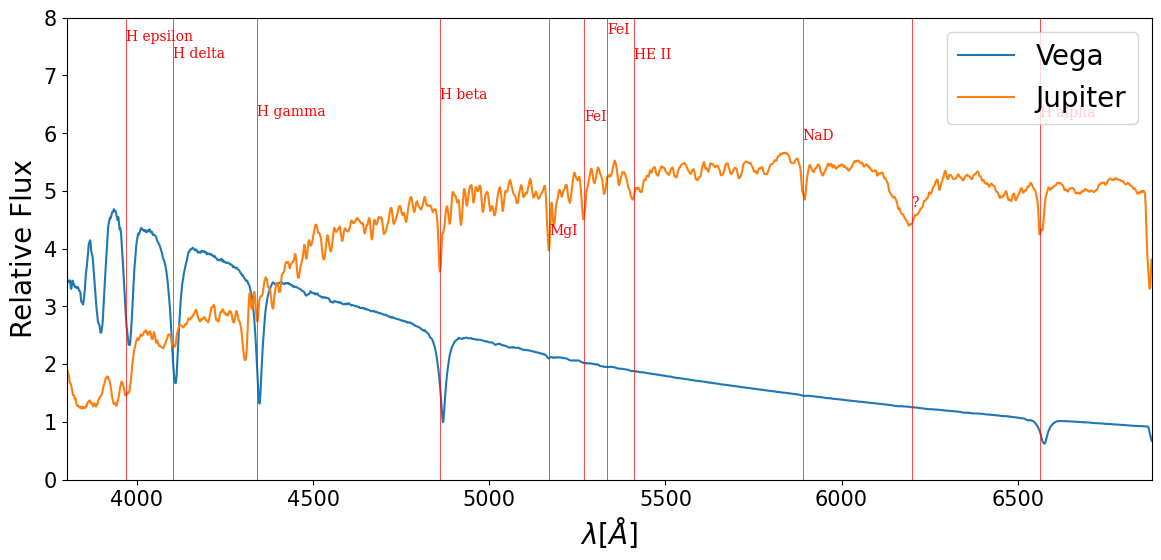

In [267]:
#plot Vega and Jupiter, where I have scaled the flux of Jupiter so that they 
#better overlap. You can change that scaling
plt.figure(figsize = (14,6))
ax = plt.gca()
plt.plot(specvega.wavelength,specvega.flux,label="Vega")
plt.plot(specjup.wavelength,specjup.flux*5,label="Jupiter")

#**************
#you can change these to zoom in and out of certain parts of the spectra.  
#Make a copy of these and change your copy so as to remember what the 
#original values were
fluxmin = 0
fluxmax = 8
lammin = 3800
lammax = 6880
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda [\AA]$",fontsize=20)
plt.ylabel("Relative Flux",fontsize=20)
plt.legend(fontsize=20)

linelist = [
     ('MgI',5170),
     ('FeI', 5270),
     ('H epsilon',3970),
     ('H delta',4103),
     ('H gamma',4341),
     ('H beta',4861),
     ('H alpha',6563),
     ('NaD', 5890),
     ('HE II',5411),
     ('FeI',5335),
     ('?',6200)
]
#draw lines on the spectrum
lineplot(linelist)

def print_matrix_join(matrix):
    # Loop over each row
    for row in matrix:
        # Convert each element to a string and join with spaces
        print(' '.join(map(str, row)))
 
JSpecLin = [['Lambda |', 'Element', '| Transition'], 
            [3970, '    H', '        Epsilon'],
            [4103, '    H', '        Delta'],
            [4341, '    H', '        Gamma'],
            [4861, '    H', '        Beta'],
            [5170, '    MgI', '      3s3P to 3s4s'],
            [5270, '    FeI', '      Not Found'],
            [5335, '    FeI', '      Not Found'],
            [5411, '    HEII', '     Not Found'],
            [5890, '    NaD', '      3s to 3p'],
            [6563, '    H', '        Alpha']]
print('Jupyter Spectral Lines:')

# Test the function with our matrix
print_matrix_join(JSpecLin)

### Problem 6 - Discuss the physical conditions that drive line formation (20 points)

In this exercise you will identify various components of the spectrum of Jupiter.  In doing this you can zoom in and out of the plot using the `ax.set_xlim` and `ax.set_ylim()` commands.  

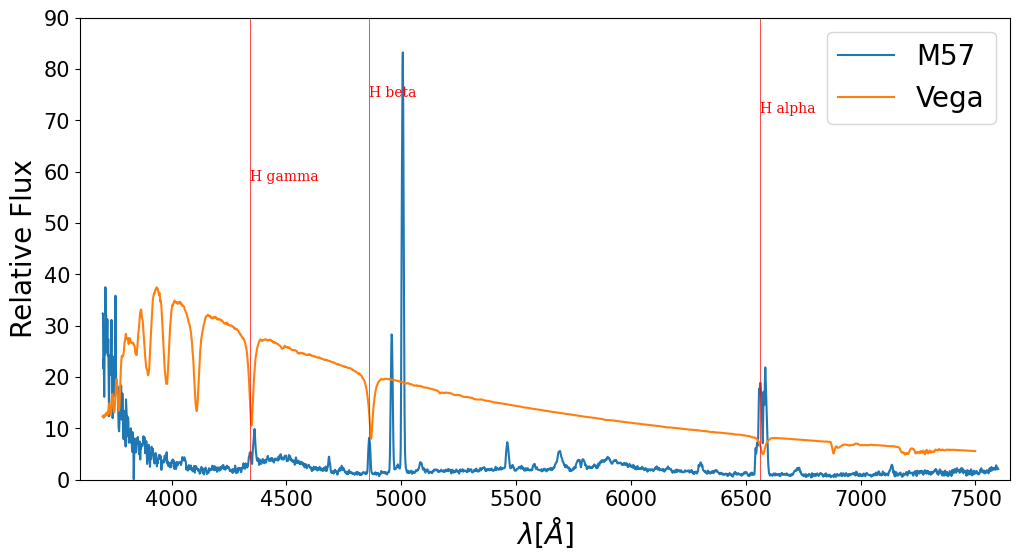

In [270]:
#plot Vega and M57, where I have scaled the flux of Jupiter so that they 
#better overlap. You can change that scaling
plt.figure(figsize = (12,6))
ax = plt.gca()
plt.plot(specm57.wavelength,specm57.flux,label="M57")
plt.plot(specvega.wavelength,specvega.flux*8,label="Vega")

#**************
#you can change these to zoom in and out of certain parts of the spectra.  
#Make a copy of these and change your copy so as to remember what the 
#original values were
fluxmin = 0
fluxmax = 90
lammin = 3600
lammax = 7650
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda [\AA]$",fontsize=20)
plt.ylabel("Relative Flux",fontsize=20)
plt.legend(fontsize=20)

linelist = [
     ('H gamma',4341),
     ('H beta',4861),
     ('H alpha',6563)
]
#draw lines on the spectrum
lineplot(linelist)

There are lines in common between M57 and Vega but they are in absorption in Vega and in Emission in M57. Note that the lines do not perfectly line up in wavelength as the M57 spectrum has not been perfectly wavelength calibrated.  

**(a)** Identify the lines in common.

**(b)** Explain why they are in emission in one spectrum and in absorption in the other.  Use your knowledge of Kirkhoffs laws.

*Note - The line at 6880$\mathring A$ is from the Earth's atmosphere and should be ignored.*

**answer here**
a) I only found three commonalities between the spectral lines of Vega and M57. These three were Hydrogen Alpha, Beta, and Gamma. This makes sense because hydrogen is of high abundance in stars.
b) We know that objects with emission lines will produce spikes on dark spectra and objects with absorption lines will produce divots or dark spots on a blackbody spectrum. The reason these line up is because M57 is emitting at certain wavelengths causing spikes and Vega is absorbing all light except for those emission wavelengths leaving a dark spot. This can be described from Kirkhoffs law that says an object at thermal equilibrium must emit an equal amount of power to what is absorbed.